In [1]:
# Automatically generated by GPRPy
import gprpy.gprpy as gp
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams['figure.dpi'] = 100
%matplotlib inline

Install fk migration if needed


In [2]:
#cmp_dir = Path('C:/Users/satuki/svalbard_pfa/gprpy test/CMP 1 shallow/Line Data/Lineset/')
cmp_dir = Path(r"C:\Users\satuki\OneDrive - Universitetet i Oslo\2025 PFA work\2025 Austfonna\pulseEKKO data\pulseEKKO better format\CMP 2 deep\Line Data\Lineset")
def read_cmp(filepath):
    """Read a CMP file from the given filepath, apply default processing, and generate hyp. stacked amplitude."""
    mygpr = gp.gprpyCW()
    mygpr.importdata(filepath,dtype='CMP')
    mygpr.adjProfile(0,10)
    mygpr.normalize()
    mygpr.tpowGain(1)
    #mygpr.linStackedAmplitude(vmin=0.16,vmax=0.3,vint=0.01)
    mygpr.hypStackedAmplitude(vmin=0.16,vmax=0.3,vint=0.01)
    return mygpr

cmps = []
# Look for all files in the directory that match the pattern line<something>.dt1 and load them
for dt1_fp in cmp_dir.glob("line*.dt1"):
    cmp = read_cmp(dt1_fp)
    # Name added only for plotting later
    cmp.name = dt1_fp.stem

    # For the second CMP and onwards, if the shape doesn't match the first, then skip it.
    if len(cmps) > 0:
        if (cmps[0].twtt.size != cmp.twtt.size) or (cmps[0].data.shape[1] != cmp.data.shape[1]):
            continue
    cmps.append(cmp)

C:\Users\satuki\OneDrive - Universitetet i Oslo\2025 PFA work\2025 Austfonna\pulseEKKO data\pulseEKKO better format\CMP 2 deep\Line Data\Lineset\line1.dt1
normalized data set


100%|██████████| 15/15 [00:01<00:00, 10.50it/s]


calculated hyperbola stacked amplitude
C:\Users\satuki\OneDrive - Universitetet i Oslo\2025 PFA work\2025 Austfonna\pulseEKKO data\pulseEKKO better format\CMP 2 deep\Line Data\Lineset\line2.dt1
normalized data set


100%|██████████| 15/15 [00:01<00:00, 10.12it/s]


calculated hyperbola stacked amplitude
C:\Users\satuki\OneDrive - Universitetet i Oslo\2025 PFA work\2025 Austfonna\pulseEKKO data\pulseEKKO better format\CMP 2 deep\Line Data\Lineset\line3.dt1
normalized data set


100%|██████████| 15/15 [00:01<00:00,  9.41it/s]


calculated hyperbola stacked amplitude
C:\Users\satuki\OneDrive - Universitetet i Oslo\2025 PFA work\2025 Austfonna\pulseEKKO data\pulseEKKO better format\CMP 2 deep\Line Data\Lineset\line4.dt1
normalized data set


100%|██████████| 15/15 [00:01<00:00,  9.98it/s]


calculated hyperbola stacked amplitude
C:\Users\satuki\OneDrive - Universitetet i Oslo\2025 PFA work\2025 Austfonna\pulseEKKO data\pulseEKKO better format\CMP 2 deep\Line Data\Lineset\line5.dt1
normalized data set


100%|██████████| 15/15 [00:01<00:00, 10.21it/s]


calculated hyperbola stacked amplitude
C:\Users\satuki\OneDrive - Universitetet i Oslo\2025 PFA work\2025 Austfonna\pulseEKKO data\pulseEKKO better format\CMP 2 deep\Line Data\Lineset\line6.dt1
normalized data set


100%|██████████| 15/15 [00:01<00:00, 10.16it/s]

calculated hyperbola stacked amplitude


In [3]:
# Collect all hyperbolic stacked amplitudes in a list
cmp_amps = []
for cmp in cmps:
    cmp_amps.append(cmp.hypStAmp)

# Stack the amplitudes by taking the mean across all CMPs
amp_stacked = np.mean(cmp_amps, axis=0)



(300.0, 0.0)

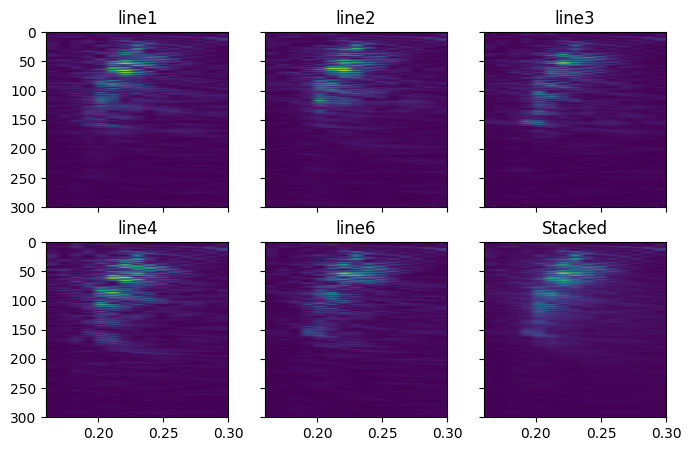

In [4]:
fig = plt.figure(figsize=(8, 5))
axes = fig.subplots(2, 3, sharex=True, sharey=True)

# Plot all CMPs plus the stacked one (hence the plus one)
for i in range(len(cmps) + 1):

    # Here's for the regular CMPs
    if i < len(cmps):
        amp = cmp_amps[i]
        title = cmps[i].name
    # The last one is the stacked
    else:
        amp = amp_stacked
        title = "Stacked"
    
    # Extract the axis from the 2D axes array
    axis = axes.ravel()[i]

    # Plot
    axis.set_title(title)
    axis.imshow(amp, aspect='auto', extent=[cmps[0].vVals.min(), cmps[0].vVals.max(), cmps[0].twtt.max(), cmps[0].twtt.min()])

#plt.imshow(amp_stacked, aspect='auto', extent=[cmps[0].vVals.min(), cmps[0].vVals.max(), cmps[0].twtt.max(), cmps[0].twtt.min()])
plt.ylim(300, 0)